In [2]:
import numpy as np

# Seed for reproducibility
np.random.seed(1000)

# Generate matrix A (1000x10)
A = np.random.randn(1000, 10)

# Generate true parameter vector x_bar
x_bar = np.zeros((10, 1))
for j in range(10):
    i = j + 1
    if i % 2 == 1:  # Odd index
        x_bar[j] = (-i + (i + 1)) * np.random.random_sample() - (i + 1)
    else:  # Even index
        x_bar[j] = ((i + 1) - i) * np.random.random_sample() + i

# Generate noise vector e (1000x1)
e = np.random.randn(1000, 1)

# Compute target vector y
y = A @ x_bar + e

# Newton Optimization Function Definitions (assuming they're already implemented)
def func(A, y, x):
    return 0.5 * (np.linalg.norm(A @ x - y))**2

def grad(A, y, x):
    return A.T @ A @ x - A.T @ y

def hess(A, y, x):
    return A.T @ A

def tolerance(p):
    return 10 ** (-p)

def newton_optimization(x, A, y, precision):
    history = []
    tol = tolerance(precision)
    iterations = 0

    while np.linalg.norm(grad(A, y, x)) > tol:
        hessian = hess(A, y, x)
        hessian_inv = np.linalg.inv(hessian)
        descent_dir = -grad(A, y, x)
        
        # Line search parameters
        alpha = 0.99
        gamma = 0.5
        decay_factor = 0.5
        
        # Perform inexact line search
        while func(A, y, x + alpha * descent_dir) > func(A, y, x) + gamma * alpha * grad(A, y, x).T @ descent_dir:
            alpha *= decay_factor
        
        # Update parameters
        x = x + alpha * hessian_inv @ descent_dir
        history.append((x.copy(), func(A, y, x), iterations))
        iterations += 1

    return x, func(A, y, x), iterations, history

# Set precision level
precision = 4

# Initial guess
x_initial = np.zeros((10, 1))

# Perform Newton's Optimization
x_optimized, f_optimized, iterations, optimization_history = newton_optimization(
    x_initial, A, y, precision
)

# Print results
print("Optimized x (x_star):", x_optimized)
print("\nFunction value at x_star (f_star):", f_optimized)
print("\nNumber of iterations:", iterations)

Optimized x (x_star): [[-1.04982253]
 [ 2.95189742]
 [-3.34298191]
 [ 4.60956005]
 [-5.71176192]
 [ 6.89877615]
 [-7.62879355]
 [ 8.16821108]
 [-9.22221195]
 [10.05669288]]

Function value at x_star (f_star): 505.64732952455546

Number of iterations: 39844


True x (x_bar): [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Optimized x (x_star): [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821111]
 [-9.22221199]
 [10.05669293]]

Function value at x_star (f_star): 505.6473295245508

Number of iterations: 18


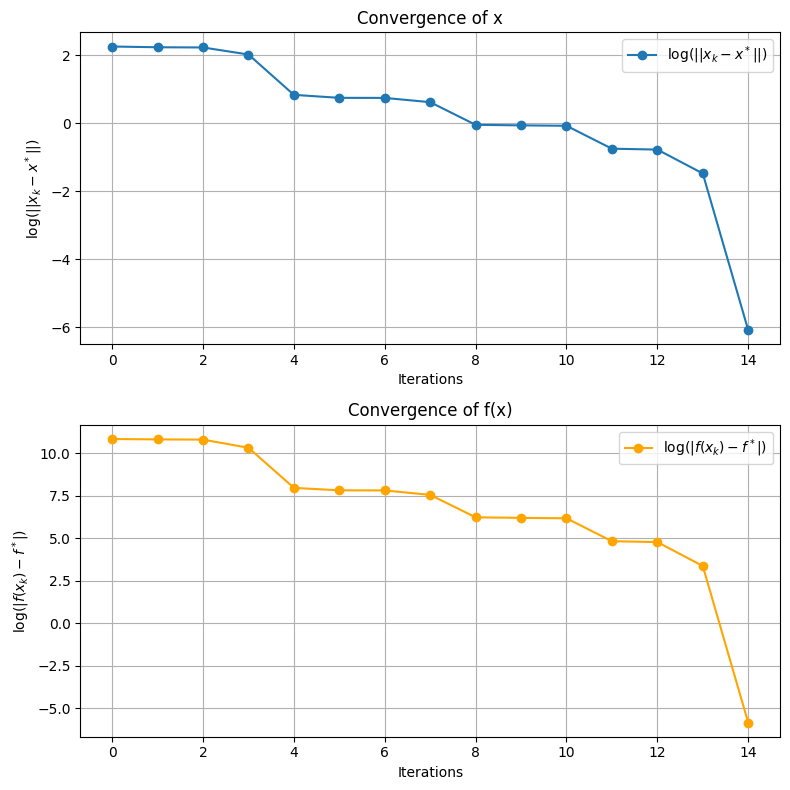

In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1000)

# Generate matrix A (1000x10)
A = np.random.randn(1000, 10)

# Generate true parameter vector x_bar
x_bar = np.zeros((10, 1))
for j in range(10):
    i = j + 1
    if i % 2 == 1:  # Odd index
        x_bar[j] = (-i + (i + 1)) * np.random.random_sample() - (i + 1)
    else:  # Even index
        x_bar[j] = ((i + 1) - i) * np.random.random_sample() + i

# Generate noise vector e (1000x1)
e = np.random.randn(1000, 1)

# Compute target vector y
y = A @ x_bar + e

# Define the objective function
def func(A, Y, x):
    return 0.5 * (np.linalg.norm(A @ x - Y))**2

# Define the gradient
def grad(A, Y, x):
    return A.T @ A @ x - A.T @ Y

# Define the Hessian (used indirectly in BFGS)
def hess(A, Y, x):
    return A.T @ A

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Compute L2 norm of a vector
def L2_norm(g):
    return np.linalg.norm(g)

# Implement the BFGS algorithm with inexact line search
def BFGS_line_search(x, A, y, B0, p):
    g = grad(A, y, x)
    history = []
    tol = tolerance(p)
    count = 0

    while L2_norm(g) > tol:
        # Initialize line search parameters
        alpha = 0.99
        decay_factor = 0.5
        gamma = 0.5

        # Compute search direction
        d = -B0 @ g

        # Perform inexact line search
        while func(A, y, x + alpha * d) > func(A, y, x) + gamma * alpha * g.T @ d:
            alpha *= decay_factor

        # Save old x values
        x_old = x.copy()

        # Update x
        x = x + alpha * d

        # Compute BFGS update parameters
        s = x - x_old
        z = grad(A, y, x) - grad(A, y, x_old)
        s_T_z = s.T @ z

        # Update B using the BFGS formula
        I = np.identity(len(x))
        if s_T_z != 0:  # Avoid division by zero
            B0 = (I - (s @ z.T) / s_T_z) @ B0 @ (I - (z @ s.T) / s_T_z) + (s @ s.T) / s_T_z

        # Update gradient
        g = grad(A, y, x)

        # Save the history of the parameters
        history.append((x.copy(), func(A, y, x), count))

        # Increment iteration count
        count += 1

    return x, func(A, y, x), count, history

# Set precision level
precision = 4

# Initial guess
x_initial = np.zeros((10, 1))

# Initialize B0 as identity matrix
B0 = np.identity(10)

# Perform BFGS Optimization
x_optimized, f_optimized, iterations, optimization_history = BFGS_line_search(
    x_initial, A, y, B0, precision
)

# Print results
print("True x (x_bar):", x_bar)
print("\nOptimized x (x_star):", x_optimized)
print("\nFunction value at x_star (f_star):", f_optimized)
print("\nNumber of iterations:", iterations)

# Prepare data for plotting convergence
I = []
x_val = []
fx_val = []

for i in range(iterations - 3):  # Adjust range to avoid domain error in log
    I.append(optimization_history[i][2])
    x_val.append(m.log(np.linalg.norm(optimization_history[i][0] - x_optimized)))
    fx_val.append(m.log(abs(optimization_history[i][1] - f_optimized)))

# Plot convergence
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot ||x_k - x*|| convergence
ax1.plot(I, x_val, marker='o', label=r"$\log(||x_k - x^*||)$")
ax1.set_title("Convergence of x")
ax1.set_xlabel("Iterations")
ax1.set_ylabel(r"$\log(||x_k - x^*||)$")
ax1.legend()
ax1.grid()

# Plot |f(x_k) - f(x^*)| convergence
ax2.plot(I, fx_val, marker='o', label=r"$\log(|f(x_k) - f^*|)$", color="orange")
ax2.set_title("Convergence of f(x)")
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"$\log(|f(x_k) - f^*|)$")
ax2.legend()
ax2.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()